#Question 1------------------------------------------------------------------------------------------------

In [1]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
print(diabetes.data.shape)
print(diabetes.target.shape)

(442, 10)
(442,)


#Question 2------------------------------------------------------------------------------------------------

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes['data'], diabetes['target'], random_state=1110)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(331, 10)
(111, 10)
(331,)
(111,)


#Question 3------------------------------------------------------------------------------------------------

In [3]:
from sklearn.linear_model import Lasso
lasso_3 = Lasso().fit(X_train, y_train)
print("train score is:",lasso_3.score(X_train,y_train))
print("test score is :",lasso_3.score(X_test,y_test))
import numpy as np
print(diabetes['feature_names'])
print(lasso_3.coef_ != 0)
print(np.sum(lasso_3.coef_ != 0))

train score is: 0.3656531744072713
test score is : 0.3749144554077899
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
[False False  True  True False False False False  True False]
3


#Question 4 ------------------------------------------------------------------------------------------------

In [4]:
X= np.genfromtxt("diabetes.data.txt",skip_header=1, usecols=np.arange(10))
print(X.shape)
y= np.genfromtxt("diabetes.data.txt",skip_header=1, usecols=10)
print(y.shape)

(442, 10)
(442,)


#Question 5 ------------------------------------------------------------------------------------------------

In [5]:
from sklearn.model_selection import train_test_split
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X,y, random_state=1110)
print(X_train_5.shape)
print(X_test_5.shape)
print(y_train_5.shape)
print(y_test_5.shape)

(331, 10)
(111, 10)
(331,)
(111,)


#Question 6 ------------------------------------------------------------------------------------------------

In [6]:
from sklearn.linear_model import Lasso
lasso_6 = Lasso().fit(X_train_5, y_train_5)
print("train score is :",lasso_6.score(X_train_5,y_train_5))
print("test score is :",lasso_6.score(X_test_5,y_test_5))
import numpy as np
print(diabetes['feature_names'])
print(lasso_6.coef_ != 0)
print(np.sum(lasso_6.coef_ != 0))

train score is : 0.5122336548548166
test score is : 0.4981823586514005
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
[ True  True  True  True  True  True  True False  True  True]
9


#Question 7------------------------------------------------------------------------------------------------

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_7 = scaler.transform(X_train)
X_test_7 = scaler.transform (X_test)

In [8]:
#Question 8 ------------------------------------------------------------------------------------------------

In [9]:
from sklearn.linear_model import Lasso
lasso_8 = Lasso().fit(X_train_7, y_train_5)
print("train score is: ",lasso_8.score(X_train_7,y_train_5))
print("test score is: ",lasso_8.score(X_test_7,y_test_5))
import numpy as np
print(diabetes['feature_names'])
print(lasso_8.coef_ != 0)
print(np.sum(lasso_8.coef_ != 0))

train score is:  0.5135354817261647
test score is:  0.5053711566848538
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
[False  True  True  True  True False  True False  True  True]
7


#question 9 ------------------------------------------------------------------------------------------------

[ 7.  8.  8.  9. 10. 10. 10. 10.]
[0.50537116 0.5044331  0.50409447 0.50298086 0.50202197 0.50258751
 0.5021855  0.50269217]


Text(0, 0.5, 'R^2(R square)')

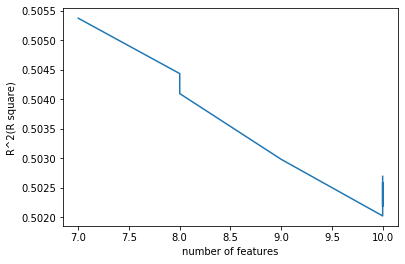

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
alpha= [1,0.6,0.5,0.1,0.01,0.05,0.02,0.06]
lasso_test = np.zeros(len(alpha))
count = np.zeros(len(alpha))
for i in range(len(alpha)):
    lasso_train= Lasso(alpha=alpha[i], max_iter=100000).fit(X_train_7, y_train)
    lasso_test[i]= lasso_train.score(X_test_7, y_test)
    count[i]=np.sum(lasso_train.coef_ != 0)

print(count)
print(lasso_test)
plt.plot(count,lasso_test)
plt.xlabel("number of features")
plt.ylabel("R^2(R square)") 
    

#question 10 ------------------------------------------------------------------------------------------------

In [11]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
best_score_value=0

alpha_new = [1,0.6,0.5,0.1,0.01,0.05,0.0002,0.0006]
max_iter_new = [1000,10000, 100000,1000000]

for new in range(len(alpha_new)) :
    for new_1 in range(len(max_iter_new)) :
        cross_value = Lasso(alpha=alpha_new[new], max_iter=max_iter_new[new_1]).fit(X_train_7, y_train_5)
        # perform cross-validation
        scores = cross_val_score(cross_value, X_train_7, y_train_5, cv=5)
        # compute mean cross-validation accuracy
        score = np.mean(scores)
        # if we got a better score, store the score and parameters
        if score > best_score_value:
            best_score_value = score 
            best_alpha_value = alpha_new[new]
            best_max_iter_value = max_iter_new[new_1]
        
lasso_10= Lasso(alpha=best_alpha_value, max_iter=best_max_iter_value).fit(X_train_7, y_train_5)
lasso_test_10= lasso_10.score(X_test_7, y_test_5)
lasso_train_10=lasso_10.score(X_train_7,y_train_5)

print(diabetes['feature_names'])
print(lasso_10.coef_ != 0)
print("number of features used:", np.sum(lasso_10.coef_ != 0))
print("Best lasso score:", best_score_value)
print("Best parameters :", best_alpha_value,best_max_iter_value)

print("resulting training: ",lasso_train_10)
print("Test set score with best parameters:", lasso_test_10)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
[ True  True  True  True  True  True  True  True  True  True]
number of features used: 10
Best lasso score: 0.4921560207781489
Best parameters : 0.01 1000
resulting training:  0.5185791084312825
Test set score with best parameters: 0.5020219736646705


#question 11------------------------------------------------------------------------------------------------

#Question:11A------------------------------------------------------------------------------------------------

In [12]:
from sklearn.model_selection import train_test_split
X_train_11, X_calibration,y_train_11, y_calibration = \
train_test_split(X_train_5, y_train_5,test_size=99, random_state=1110)
print(X_train_11.shape)
print(X_calibration.shape)



(232, 10)
(99, 10)


#Question 11B------------------------------------------------------------------------------------------------

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_11)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [14]:
X_train_11_b = scaler.transform(X_train_11)
X_calibration_11_b = scaler.transform (X_calibration)
X_test_11_b=scaler.transform(X_test_5)

In [15]:
X_calibration_11_b.size

990

#Question 11 C------------------------------------------------------------------------------------------------

In [16]:
import math
from decimal import Decimal
lasso_train= Lasso(alpha=best_alpha_value, max_iter=best_max_iter_value).fit(X_train_11_b, y_train_11)
calibration_lasso= lasso_train.fit(X_calibration_11_b,y_calibration)



#for the value of k =20%---------------------------------------------------------------------------------

In [17]:
y_dash=calibration_lasso.predict(X_calibration_11_b)
alpha_11_c = abs(y_calibration-y_dash)
y_dash_new=np.sort(alpha_11_c)

e_value_1= 0.05

m=alpha_11_c.size
k_value = math.ceil((1-e_value_1)*(m+1))
c_value= y_dash_new[k_value]

y_test_7_hat=lasso_train.predict(X_test_7)
y_test_7_hat=np.sort(y_test_7_hat)
test_value_11_c= np.zeros([])
test_value_11_c= np.concatenate([y_test_7_hat-c_value,y_test_7_hat+c_value])

length_11=len(test_value_11_c)


#for the value of k = 20% -------------------------------------------------------------------------------------

In [18]:
e_value_1= 0.02

m=alpha_11_c.size
k_value = math.ceil((1-e_value_1)*(m+1))
c_value= y_dash_new[k_value]

y_test_7_hat=lasso_train.predict(X_test_7)
y_test_7_hat=np.sort(y_test_7_hat)
test_value_11_c= np.zeros([])
test_value_11_c= np.concatenate([y_test_7_hat-c_value,y_test_7_hat+c_value])
len(test_value_11_c)

length_12=len(test_value_11_c)


#Question 12------------------------------------------------------------------------------------------------


#Question 12A ------------------------------------------------------------------------------------------------

In [19]:
import numpy as np
print(diabetes['feature_names'])
print(lasso_3.coef_ != 0)
print(np.sum(lasso_3.coef_ != 0))

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
[False False  True  True False False False False  True False]
3


#Question 12B ------------------------------------------------------------------------------------------------

In [20]:
import numpy as np
print(diabetes['feature_names'])
print(lasso_6.coef_ != 0)
print(np.sum(lasso_6.coef_ != 0))

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
[ True  True  True  True  True  True  True False  True  True]
9


#Question 12C ------------------------------------------------------------------------------------------------

In [21]:
import numpy as np
print(diabetes['feature_names'])
print(lasso_8.coef_ != 0)
print(np.sum(lasso_8.coef_ != 0))

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
[False  True  True  True  True False  True False  True  True]
7


#Question 12D ------------------------------------------------------------------------------------------------

In [22]:
print(diabetes['feature_names'])
print(lasso_10.coef_ != 0)
print("number of features used:", np.sum(lasso_10.coef_ != 0))

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
[ True  True  True  True  True  True  True  True  True  True]
number of features used: 10


#Question 12E ------------------------------------------------------------------------------------------------

In [23]:
print("length of predication interval for k = 0.05 is:",int((length_11/2)))
print("length of predication interval for k = 0.02 is:",int((length_12/2)))

length of predication interval for k = 0.05 is: 111
length of predication interval for k = 0.02 is: 111


#explaination Question 3 ------------------------------------------------------------------------------------------------
#features used: bmi, bp, s5
#total number of features used = 3
#out of 10 features only 3 features are used in the Lasso calculation 

Question 3  Here numbe rof features used are incrersed to 9 from 3 (which is in question 3)

Question 8 Result is almost same is the resukt of quesyion 6. as, and numbe rof features are 7

Question 9 as the value of paramters increases to it maximum value(i.e 10), the output becomes the stable(vertical lines)

Question-10 here all features are used by Using cross validation. 

Question-12 Here the length of predication interval is printed for the value of k = 5% and k =20 %